# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()
df.columns.str.strip()

197625


Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

## Rename all the columns to lower case

In [4]:
#Your code here
df.columns= [col.lower() for col in df.columns]
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [5]:
df = df.set_index('linename')
df.head()
#Your code here

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [6]:
df=df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


In [7]:
lst = ['sdfa','a3rgdf']
[len(i) for i in lst]
    

[4, 6]

In [8]:
a=[len(i) for i in list(df['linename'])]
type(a)
    

list

## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [9]:
df['num_lines'] = a
df = df.sort_values(by='num_lines', ascending=False)
df.head()

# Your code here

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Write a function to clean a column name

In [12]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [13]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [14]:
# Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [15]:
df.date = pd.to_datetime(df.date)
   
   # Your code here

In [17]:
df["day_of_week"] = df.date.dt.dayofweek

In [18]:
grouped = df.groupby('day_of_week').sum()

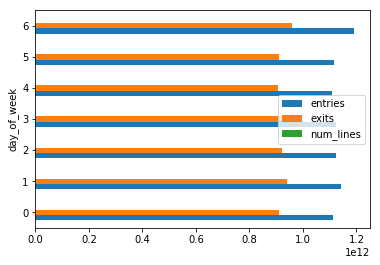

In [19]:
grouped.plot(kind='barh')

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

,index,day_of_week,entries,exits,num_lines,IsWeekend
0,0,0,1114237052454,911938153513,76110,False
1,1,1,1143313287046,942230721477,77303,False
2,2,2,1123655222441,920630864687,75713,False
3,3,3,1122723988662,920691927110,76607,False
4,4,4,1110224700078,906799065337,75573,False
5,5,5,1115661545514,909142081474,74725,True
6,6,6,1192306179082,959223750461,75306,True


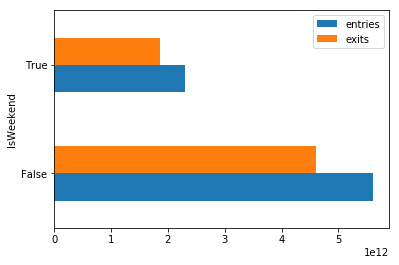

In [29]:
grouped['IsWeekend'] = grouped.day_of_week.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').sum()
wkend[['entries', 'exits']].plot(kind='barh')
grouped

#Your code here

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Drop a couple of columns

In [35]:
df.head()# Your code here
df.drop(['c/a','scp'], axis=1)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_week
132292,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,3
2686,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,2
2673,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-27,16:00:00,REGULAR,2830710,3305818,12,0
2674,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-27,20:00:00,REGULAR,2832048,3306310,12,0
2675,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-28,00:00:00,REGULAR,2832325,3306433,12,1
2676,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-28,04:00:00,REGULAR,2832359,3306438,12,1
2677,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-28,08:00:00,REGULAR,2832561,3306716,12,1
2678,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-28,09:57:08,REGULAR,2832815,3307705,12,1
2679,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-28,12:00:00,REGULAR,2832994,3308064,12,1
2680,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-28,16:00:00,REGULAR,2833390,3308536,12,1


## Summary

Great! You practiced your data cleanup-skills using Pandas.